# FAANG Stock Analysis (As of 15 Jan 2022)

---

**Table of Content**

---

# 1.0 Objectives

- To predict BUY and SELL date for FAANG stock
- Forecast closing price of FAANG for T+30 days

# 2.0 Dataset Information

## 2.1 Description

FAANG refers to Meta (previously known as Facebook), Amazon, Apple, Netflix and Alphabet (previously known as Google). These five corporate stock bundled together is widely known as the FAANG. They are the pioneer in the tech industry. All of them are listed on the Nasdaq Stock Market in the United States(US).

The FAANG stock dataset will be fetched directly using *pandas_datareader* library with the source from *Yahoo Finance*

NASDAQ Index will be used as a benchmark against the FAANG securities

## 2.2 Data Dictionary
Their stock ticker symbol as follows:

|Corporate|Ticker Symbol|
| :---    | :---        |
| Meta Platforms, Inc | FB |
| Amazon.com., Inc | AMZN |
| Apple Inc. | AAPL |
| Netflix, Inc. | NFLX |
| Alphabet Inc. | GOOG |

## 2.3 Assumption

- The dataset will only consist Alphabet Class C stock (GOOG). Alphabet Class A stock (GOOGL) will not take into consideration.
- Adopt swing trading style
- Holding for any security has a minimum 1 and maximum 20 business days for BUY position
- Will not execute SHORT position for any security
- Risk management is involved when trading the stock

# 3.0 Import Library

In [1]:
# System
import sys
import os

# Date
from datetime import date, datetime, timedelta

# Fetch data
import pandas_datareader.data as web

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

In [2]:
# Deep learning model
import tensorflow as tf

# 4.0 Set Constant and Default Settings

In [3]:
plt.rcParams['figure.dpi'] = 150
sns.set_style('dark')

In [70]:
# Date
today_date = date.today()
one_year_duration = timedelta(days=365)
data_format = '%Y-%m-%d'

# Stock info source
data_source = 'yahoo'

# Base directory
base_dir = os.path.join('datasets')

# FAANG info
faang = {
    'FB': {
        'ticker': 'FB',
        'filename': f"{os.path.join(base_dir, 'fb.csv')}"
    },
    'AMZN': {
        'ticker': 'AMZN',
        'filename': f"{os.path.join(base_dir, 'amzn.csv')}"
    },
    'AAPL': {
        'ticker': 'AAPL',
        'filename': f"{os.path.join(base_dir, 'aapl.csv')}"
    },
    'NFLX': {
        'ticker': 'NFLX',
        'filename': f"{os.path.join(base_dir, 'nlfx.csv')}"
    },
    'GOOG': {
        'ticker': 'GOOG',
        'filename': f"{os.path.join(base_dir, 'goog.csv')}"
    }
}

# Market index
mkt_index = {
    '^IXIC': {
        'ticker': '^IXIC',
        'filename': f"{os.path.join(base_dir, 'ixic.csv')}"
    }
}

# 5.0 Fetch, Write and Load Dataset

In [59]:
def fetch_securities(securities, end_date = None):
    if not end_date:
        end_date = today_date

    start_date = end_date - one_year_duration
    
    start = start_date.strftime(data_format)
    end = end_date.strftime(data_format)
    
    for info in securities.values():
        df = web.DataReader(info['ticker'], data_source, start=start, end=end)

        df = df.reset_index()
        df.to_csv(info['filename'], index=False)


In [71]:
# Uncomment to download data
fetch_securities(faang, datetime(2022, 4, 15))
fetch_securities(mkt_index, datetime(2022, 4, 15))

In [50]:
fb_df = pd.read_csv(faang['FB']['filename'], parse_dates=['Date'], index_col='Date')
amzn_df = pd.read_csv(faang['AMZN']['filename'], parse_dates=['Date'], index_col='Date')
aapl_df = pd.read_csv(faang['AAPL']['filename'], parse_dates=['Date'], index_col='Date')
nflx_df = pd.read_csv(faang['NFLX']['filename'], parse_dates=['Date'], index_col='Date')
goog_df = pd.read_csv(faang['GOOG']['filename'], parse_dates=['Date'], index_col='Date')

ixic_df = pd.read_csv(faang['IXIC']['filename'], parse_dates=['Date'], index_col='Date')

In [ ]:
securities_df = [
    fb_df,
    amzn_df,
    aapl_df,
    nflx_df,
    goog_df,
    ixic_df
]

# 6.0 Exploratory Data Analysis (EDA)

## 6.1 Overview of Dataset

In [30]:
def ticker_overview(df: pd.DataFrame, name=None):
    print(f"First 5 row{' of ' + name if name else ''}")
    display(df.head())

    print(f"\nColumns{' of ' + name if name else ''}")
    display(df.columns)

    print(f"\nInfo{' of ' + name if name else ''}")
    df.info()

    print(f"\nStats{' of ' + name if name else ''}")
    display(df.describe().T)

In [31]:
ticker_overview(fb_df, name='FB')

First 5 row of FB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,308.029999,301.950012,307.299988,302.820007,17421400,302.820007
2021-04-15,310.140015,304.100006,306.339996,307.820007,14558300,307.820007
2021-04-16,308.950012,304.609985,308.170013,306.179993,13059200,306.179993
2021-04-19,307.700012,300.559998,305.010010,302.239990,14553500,302.239990
2021-04-20,305.100006,297.209991,301.989990,302.649994,16796400,302.649994



Columns of FB


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Info of FB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-14 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    int64  
 5   Adj Close  255 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB

Stats of FB


,count,mean,std,min,25%,50%,75%,max
High,255.0,3.166569e+02,5.245129e+01,1.922800e+02,3.084450e+02,3.343800e+02,3.494150e+02,3.843300e+02
Low,255.0,3.088285e+02,5.262672e+01,1.858200e+02,3.008350e+02,3.261600e+02,3.410600e+02,3.788100e+02
Open,255.0,3.127314e+02,5.259758e+01,1.870300e+02,3.046450e+02,3.301200e+02,3.443800e+02,3.816800e+02
Close,255.0,3.127290e+02,5.267981e+01,1.866300e+02,3.044150e+02,3.300500e+02,3.444100e+02,3.821800e+02
Volume,255.0,2.294725e+07,1.699165e+07,7.170700e+06,1.414275e+07,1.802380e+07,2.719015e+07,1.881199e+08
Adj Close,255.0,3.127290e+02,5.267981e+01,1.866300e+02,3.044150e+02,3.300500e+02,3.444100e+02,3.821800e+02


In [32]:
ticker_overview(amzn_df, name='AMZN')

First 5 row of AMZN


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,3404.129883,3326.000000,3404.040039,3333.000000,3145200,3333.000000
2021-04-15,3397.000000,3352.000000,3371.000000,3379.090088,3233600,3379.090088
2021-04-16,3406.800049,3355.590088,3380.000000,3399.439941,3186000,3399.439941
2021-04-19,3435.929932,3360.159912,3390.330078,3372.010010,2725400,3372.010010
2021-04-20,3382.989990,3316.000000,3373.600098,3334.689941,2623000,3334.689941



Columns of AMZN


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Info of AMZN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-14 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    int64  
 5   Adj Close  255 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB

Stats of AMZN


,count,mean,std,min,25%,50%,75%,max
High,255.0,3.357204e+03,1.933314e+02,2.805000e+03,3.253960e+03,3.368140e+03,3.482995e+03,3.773080e+03
Low,255.0,3.280996e+03,2.045778e+02,2.671450e+03,3.197815e+03,3.303810e+03,3.411755e+03,3.696790e+03
Open,255.0,3.321186e+03,1.977412e+02,2.733670e+03,3.218960e+03,3.343610e+03,3.451820e+03,3.744000e+03
Close,255.0,3.317841e+03,2.001950e+02,2.720290e+03,3.224095e+03,3.334690e+03,3.447440e+03,3.731410e+03
Volume,255.0,3.437322e+06,1.414434e+06,1.680300e+06,2.569350e+06,3.145200e+06,3.838950e+06,1.267280e+07
Adj Close,255.0,3.317841e+03,2.001950e+02,2.720290e+03,3.224095e+03,3.334690e+03,3.447440e+03,3.731410e+03


In [33]:
ticker_overview(aapl_df, name='AAPL')

First 5 row of AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,135.000000,131.660004,134.940002,132.029999,87222800.0,131.249908
2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,133.705322
2021-04-16,134.669998,133.279999,134.300003,134.160004,84922400.0,133.367340
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.043289
2021-04-20,135.529999,131.809998,135.020004,133.110001,94812300.0,132.323547



Columns of AAPL


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Info of AAPL
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-14 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    float64
 5   Adj Close  255 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB

Stats of AAPL


,count,mean,std,min,25%,50%,75%,max
High,255.0,1.536721e+02,1.648506e+01,1.246400e+02,1.435650e+02,1.507200e+02,1.695000e+02,1.829400e+02
Low,255.0,1.505190e+02,1.574062e+01,1.222500e+02,1.408550e+02,1.482700e+02,1.647200e+02,1.791200e+02
Open,255.0,1.520081e+02,1.613074e+01,1.231600e+02,1.420050e+02,1.493600e+02,1.671750e+02,1.826300e+02
Close,255.0,1.521747e+02,1.615166e+01,1.227700e+02,1.420100e+02,1.494800e+02,1.659900e+02,1.820100e+02
Volume,255.0,8.654096e+07,2.538186e+07,4.100000e+07,6.907255e+07,8.153200e+07,9.849635e+07,1.954327e+08
Adj Close,255.0,1.518288e+02,1.633743e+01,1.222519e+02,1.415678e+02,1.490722e+02,1.658842e+02,1.817784e+02


In [34]:
ticker_overview(nflx_df, name='NFLX')

First 5 row of NFLX


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,554.869995,538.530029,554.869995,540.020020,3740300,540.020020
2021-04-15,553.489990,542.659973,544.169983,549.219971,3139100,549.219971
2021-04-16,551.979980,539.510010,550.539978,546.539978,3209100,546.539978
2021-04-19,556.440002,545.530029,546.900024,554.440002,4288700,554.440002
2021-04-20,563.559998,546.299988,554.419983,549.570007,11257600,549.570007



Columns of NFLX


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Info of NFLX
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-14 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    int64  
 5   Adj Close  255 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB

Stats of NFLX


,count,mean,std,min,25%,50%,75%,max
High,255.0,5.301107e+02,9.576896e+01,3.413200e+02,4.930950e+02,5.268400e+02,6.094450e+02,7.009900e+02
Low,255.0,5.160521e+02,9.575549e+01,3.298200e+02,4.827600e+02,5.179900e+02,5.921150e+02,6.860900e+02
Open,255.0,5.236696e+02,9.556153e+01,3.351000e+02,4.875150e+02,5.218200e+02,5.986400e+02,6.923500e+02
Close,255.0,5.229546e+02,9.570993e+01,3.310100e+02,4.869800e+02,5.205500e+02,5.988900e+02,6.916900e+02
Volume,255.0,4.804616e+06,4.991227e+06,1.287200e+06,2.717500e+06,3.740300e+06,5.129700e+06,5.890430e+07
Adj Close,255.0,5.229546e+02,9.570993e+01,3.310100e+02,4.869800e+02,5.205500e+02,5.988900e+02,6.916900e+02


In [35]:
ticker_overview(goog_df, name='GOOG')

First 5 row of GOOG


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,2277.989990,2249.189941,2275.159912,2254.840088,1011000,2254.840088
2021-04-15,2306.596924,2266.000000,2276.979980,2296.659912,1373600,2296.659912
2021-04-16,2306.439941,2284.449951,2303.000000,2297.760010,1129800,2297.760010
2021-04-19,2318.449951,2287.844971,2291.979980,2302.399902,1234400,2302.399902
2021-04-20,2309.600098,2271.709961,2307.889893,2293.629883,1088700,2293.629883



Columns of GOOG


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Info of GOOG
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-14 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    int64  
 5   Adj Close  255 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB

Stats of GOOG


,count,mean,std,min,25%,50%,75%,max
High,255.0,2.729072e+03,197.834507,2276.601074,2613.660034,2.766430e+03,2.885475e+03,3.042000e+03
Low,255.0,2.677433e+03,193.430866,2230.050049,2540.714966,2.712340e+03,2.833720e+03,2.997750e+03
Open,255.0,2.704785e+03,197.017954,2261.090088,2575.709961,2.741660e+03,2.863615e+03,3.037270e+03
Close,255.0,2.703078e+03,195.284487,2239.080078,2578.399902,2.738800e+03,2.855835e+03,3.014180e+03
Volume,255.0,1.252887e+06,502038.958817,593300.000000,942050.000000,1.141600e+06,1.416150e+06,4.487500e+06
Adj Close,255.0,2.703078e+03,195.284487,2239.080078,2578.399902,2.738800e+03,2.855835e+03,3.014180e+03


In [63]:
ticker_overview(ixic_df, name='^IXIC')

First 5 row of ^IXIC


,High,Low,Open,Close,Volume,Adj Close,Daily Ret,Cum Ret
Date,,,,,,,,
2021-04-14,14033.629883,13839.040039,14004.080078,13857.839844,4102380000,13857.839844,NaN,NaN
2021-04-15,14049.129883,13970.419922,13983.230469,14038.759766,4382620000,14038.759766,0.013055,0.013055
2021-04-16,14062.500000,13977.049805,14059.110352,14052.339844,4414640000,14052.339844,0.000967,0.014035
2021-04-19,14041.790039,13842.570312,13984.580078,13914.769531,4349340000,13914.769531,-0.009790,0.004108
2021-04-20,13927.669922,13698.669922,13894.459961,13786.269531,4229410000,13786.269531,-0.009235,-0.005165



Columns of ^IXIC


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Daily Ret',
       'Cum Ret'],
      dtype='object')


Info of ^IXIC
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-04-14 to 2022-04-14
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    int64  
 5   Adj Close  255 non-null    float64
 6   Daily Ret  254 non-null    float64
 7   Cum Ret    254 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 17.9 KB

Stats of ^IXIC


,count,mean,std,min,25%,50%,75%,max
High,255.0,1.462720e+04,7.638334e+02,1.291801e+04,1.403202e+04,1.464203e+04,1.520198e+04,1.621223e+04
Low,255.0,1.440831e+04,8.007854e+02,1.255535e+04,1.378690e+04,1.447138e+04,1.500994e+04,1.601723e+04
Open,255.0,1.452809e+04,7.872110e+02,1.258788e+04,1.394945e+04,1.455859e+04,1.513026e+04,1.612092e+04
Close,255.0,1.452307e+04,7.842087e+02,1.258122e+04,1.389448e+04,1.453255e+04,1.511858e+04,1.605744e+04
Volume,255.0,4.716551e+09,7.704609e+08,3.379850e+09,4.171520e+09,4.553380e+09,5.110365e+09,8.109950e+09
Adj Close,255.0,1.452307e+04,7.842087e+02,1.258122e+04,1.389448e+04,1.453255e+04,1.511858e+04,1.605744e+04
Daily Ret,254.0,-5.931741e-05,1.323469e-02,-3.736623e-02,-7.170530e-03,5.814601e-04,8.019469e-03,3.768198e-02
Cum Ret,254.0,4.819307e-02,5.662057e-02,-9.212259e-02,2.729516e-03,4.902135e-02,9.108869e-02,1.587261e-01


All the FAANG and Nasdaq Index dataset don't have missing value. The total trading days for the past year from 15 April 2022 is 255 days.

## 7.2 Cumulative Return of FAANG 

In [37]:
def cal_cum_mul_ret(df: pd.DataFrame):
    df['Daily Ret'] = df['Adj Close'].pct_change()
    pct_plus_one =  df['Daily Ret'].add(1)
    df['Cum Ret'] = pct_plus_one.cumprod().sub(1)

    return df

In [55]:
fb_df = cal_cum_mul_ret(fb_df)
amzn_df = cal_cum_mul_ret(amzn_df)
aapl_df = cal_cum_mul_ret(aapl_df)
nflx_df = cal_cum_mul_ret(nflx_df)
goog_df = cal_cum_mul_ret(goog_df)

In [53]:
ixic_df = cal_cum_mul_ret(ixic_df)

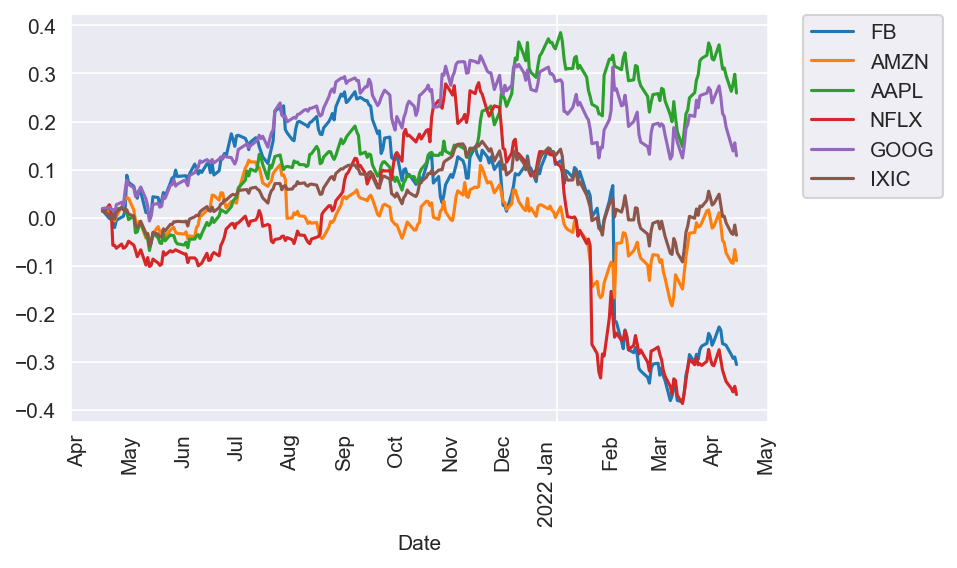

In [81]:
ax = fb_df['Cum Ret'].plot(label='FB')
amzn_df['Cum Ret'].plot(label='AMZN', ax=ax)
aapl_df['Cum Ret'].plot(label='AAPL', ax=ax)
nflx_df['Cum Ret'].plot(label='NFLX', ax=ax)
goog_df['Cum Ret'].plot(label='GOOG', ax=ax)
ixic_df['Cum Ret'].plot(label='IXIC', ax=ax)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.legend(loc=(1.05, .55))
plt.show()

## 7.1 Past 1 Year Adj Close Price of Individual FAANG Stocks

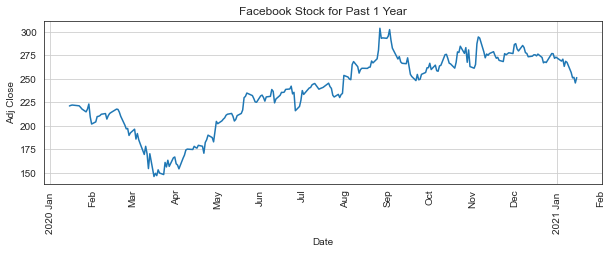

In [ ]:
ax = sns.lineplot(data=fb_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Facebook Stock for Past 1 Year')

plt.show()

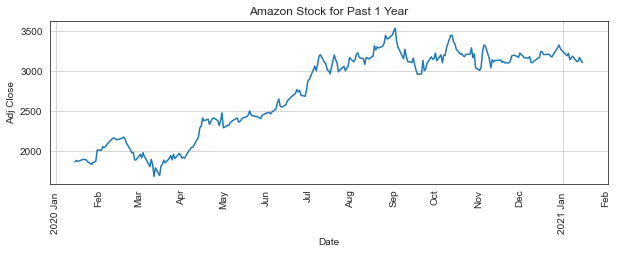

In [ ]:
ax = sns.lineplot(data=amzn_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Amazon Stock for Past 1 Year')

plt.show()

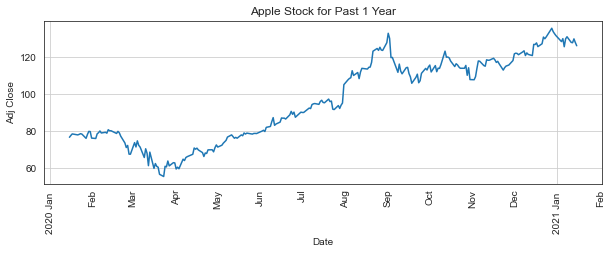

In [ ]:
ax = sns.lineplot(data=aapl_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Apple Stock for Past 1 Year')

plt.show()

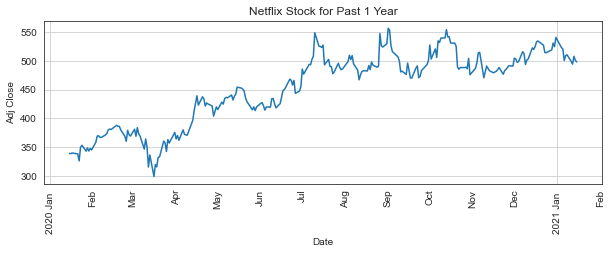

In [ ]:
ax = sns.lineplot(data=nflx_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Netflix Stock for Past 1 Year')

plt.show()

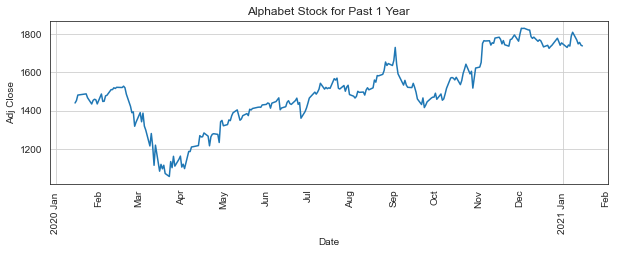

In [ ]:
ax = sns.lineplot(data=goog_df, x='Date', y='Adj Close', sort=True)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %b"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xlabel('Date')
ax.set_title('Alphabet Stock for Past 1 Year')

plt.show()

## 7.2 Daily Return of FAANG Stocks

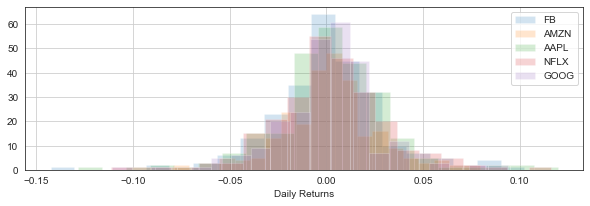

In [ ]:
fb_df['Adj Close'].pct_change(1).hist(label='FB',alpha=0.2,bins=20)
amzn_df['Adj Close'].pct_change(1).hist(label='AMZN',alpha=0.2,bins=20)
aapl_df['Adj Close'].pct_change(1).hist(label='AAPL',alpha=0.2,bins=20)
nflx_df['Adj Close'].pct_change(1).hist(label='NFLX',alpha=0.2,bins=20)
goog_df['Adj Close'].pct_change(1).hist(label='GOOG',alpha=0.2,bins=20)

plt.xlabel("Daily Returns")
plt.legend()

<br />

# 8.0 Preprocess

In [ ]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
          self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
            
        return inputs, labels
    
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)
        
        ds = ds.map(self.split_window)
        
        return ds
    
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    
    @property
    def val(self):
        return self.make_dataset(self.val_df)

    
    @property
    def test(self):
        return self.make_dataset(self.test_df)

    
    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result
    
    
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=patience,
                                                        mode='min')
    
    model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.optimizers.Adam(),
                    metrics=[tf.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                          validation_data=window.val,
                          callbacks=[early_stopping])
    
    return history

In [ ]:
fb_df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Log Adj Close'],
      dtype='object')

In [ ]:
fb_df_len = len(fb_df)
fb_train_df = fb_df[:int(fb_df_len * 0.7)]
fb_val_df = fb_df[int(fb_df_len * 0.7):int(fb_df_len * 0.9)]
fb_test_df = fb_df[int(fb_df_len * 0.9):]

In [ ]:
fb_window = WindowGenerator(input_width=10, label_width=1, shift=10, label_columns=['Adj Close'], 
                            train_df=fb_train_df, val_df=fb_val_df, test_df=fb_test_df)

In [ ]:
fb_window

Total window size: 20
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [19]
Label column name(s): ['Adj Close']

In [ ]:
val_performance = {}
performance = {}

In [ ]:
wide_window = WindowGenerator(input_width=10, label_width=1, shift=10, label_columns=['Adj Close'], 
                            train_df=fb_train_df, val_df=fb_val_df, test_df=fb_test_df)

In [ ]:
wide_window.train_df

,Date,High,Low,Open,Close,Volume,Adj Close,Log Adj Close
0,2020-01-15,221.679993,220.139999,220.610001,221.149994,10036500,221.149994,5.398841
1,2020-01-16,222.630005,220.389999,222.570007,221.770004,10015300,221.770004,5.401641
2,2020-01-17,222.289993,220.529999,222.029999,222.139999,15905900,222.139999,5.403308
3,2020-01-21,222.369995,219.119995,222.160004,221.440002,14275800,221.440002,5.400152
4,2020-01-22,222.750000,221.279999,222.309998,221.320007,12212800,221.320007,5.399610
...,...,...,...,...,...,...,...,...
172,2020-09-21,249.949997,244.130005,247.539993,248.149994,24709400,248.149994,5.514033
173,2020-09-22,255.320007,248.220001,253.309998,254.750000,30293100,254.750000,5.540283
174,2020-09-23,257.989990,248.149994,255.259995,249.020004,19641300,249.020004,5.517533
175,2020-09-24,252.240005,245.619995,246.500000,249.529999,20006800,249.529999,5.519579


In [ ]:
wide_window = WindowGenerator(input_width=10, label_width=1, shift=10, label_columns=['Adj Close'], 
                            train_df=fb_train_df, val_df=fb_val_df, test_df=fb_test_df)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=64)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

TypeError: float() argument must be a string or a number, not 'Timestamp'

# 8.0 Building Model

# 7.0 Summary